In [225]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# evaluation matrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,ConfusionMatrixDisplay
sns.set()

In [226]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HealthCare Domain/kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [227]:
data.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [228]:
data.isnull().sum()/len(data)*100

,0
id,0.00
age,2.25
bp,3.00
sg,11.75
al,11.50
su,12.25
rbc,38.00
pc,16.25
pcc,1.00
ba,1.00


In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [230]:
# Finding the unique values in the given columns

for i in data.columns:
  print('**********************************', i, '*******************************')
  print()
  print(set(data[i].tolist()))
  print()

********************************** id *******************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207

In [231]:
data['rc'].mode()[0]

'5.2'

In [232]:
data['pcv'] = data['pcv'].apply(lambda x:'43' if x=='\t43' else x)
data['pcv'] = data['pcv'].apply(lambda x: '41' if x == '\t?' else x)

#wc
data['wc'] = data['wc'].apply(lambda x:'6200' if x == '\t6200' else x)
data['wc'] = data['wc'].apply(lambda x:'8400' if x == '\t8400' else x)
data['wc'] = data['wc'].apply(lambda x:'9800' if x == '\t?' else x)

#rc
data['rc'] = data['rc'].apply(lambda x:'5.2' if x == '\t?' else x)

# classification
data['classification'] = data['classification'].apply(lambda x:'ckd' if x=='ckd\t' else x)
#cad
data['cad'] = data['cad'].apply(lambda x:'no' if x == '\tno' else x)

#dm
data['dm'] = data['dm'].apply(lambda x:'no' if x == '\tno' else x)
data['dm'] = data['dm'].apply(lambda x:'yes' if x == '\tyes' else x)


In [233]:
# Finding the unique values in the given columns

for i in data.columns:
  print('**********************************', i, '*******************************')
  print()
  print(set(data[i].tolist()))
  print()

********************************** id *******************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207

In [234]:
print(data['pcv'].mode()[0])
print(data['wc'].mode()[0])
print(data['rc'].mode()[0])

41
9800
5.2


In [235]:
data['pcv'] = data['pcv'].fillna(data['pcv'].mode()[0])
data['wc'] = data['wc'].fillna(data['wc'].mode()[0])
data['rc'] = data['rc'].fillna(data['rc'].mode()[0])

In [236]:
data['pcv'] = data['pcv'].astype('int64')
data['wc'] = data['wc'].astype('int64')
data['rc'] = data['rc'].astype('float64')

In [237]:
# apart from simpleImputer we can also use this , but this with this we can't clear the all NAN values at its just to view either obj or num

num=[]
obj=[]

for cols in data.columns:
  if data[cols].dtypes !='O':
    num.append(cols)
  else:
    obj.append(cols)

In [238]:
imp_mode1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mode2 = SimpleImputer(missing_values=np.nan, strategy='median')

data_imp1 = pd.DataFrame(imp_mode1.fit_transform(data[obj]))
data_imp1.columns = data[obj].columns
data_imp2 = pd.DataFrame(imp_mode2.fit_transform(data[num]))
data_imp2.columns = data[num].columns

In [239]:
data[obj].columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [240]:
data[num].columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')

In [241]:
print(data_imp1.isnull().sum().sum())

print(data_imp2.isna().sum().sum())

0
0


In [242]:
data_imp1.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [243]:
data_imp2.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,1.0,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2
2,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2
3,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,4.0,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6


In [244]:
# we dont have any use with ID so, drop it
data_imp2 = data_imp2.iloc[:,1:]  #.drop(columns=['id'])
data_imp2.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6


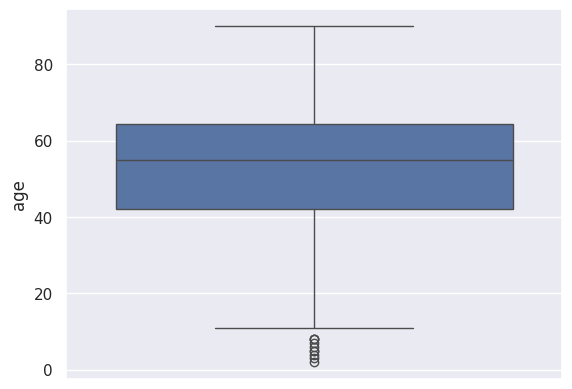

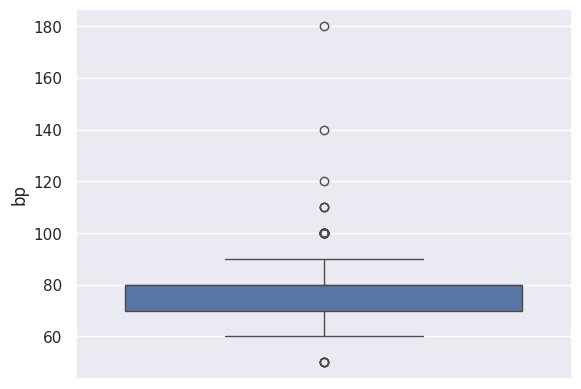

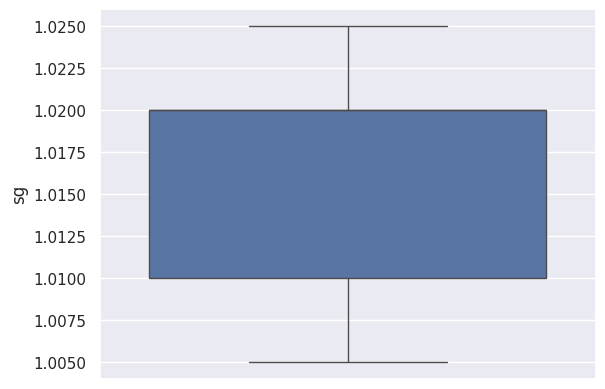

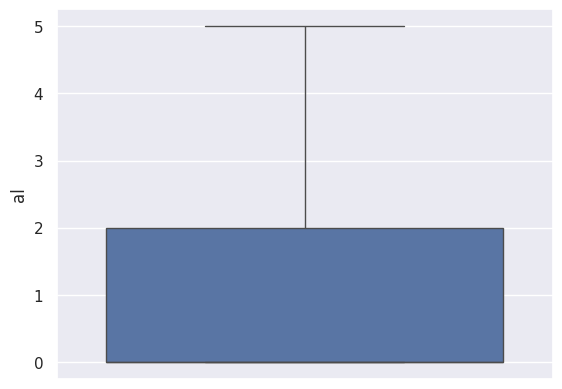

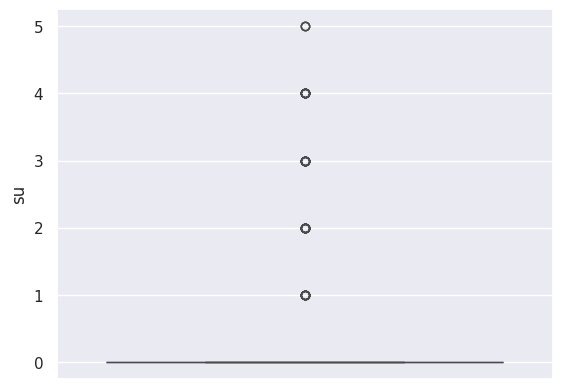

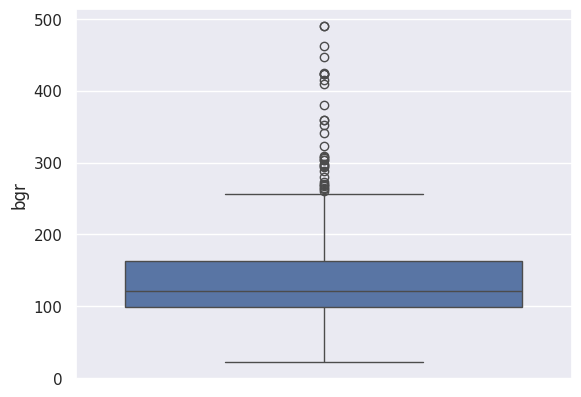

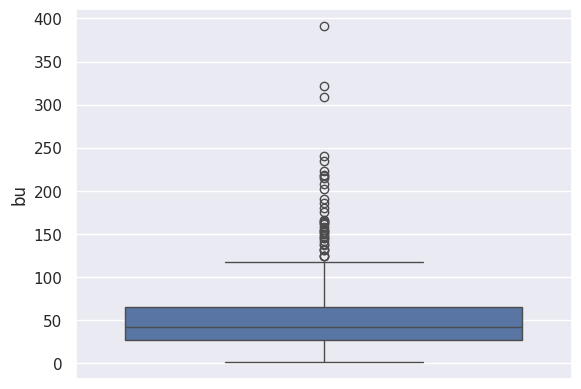

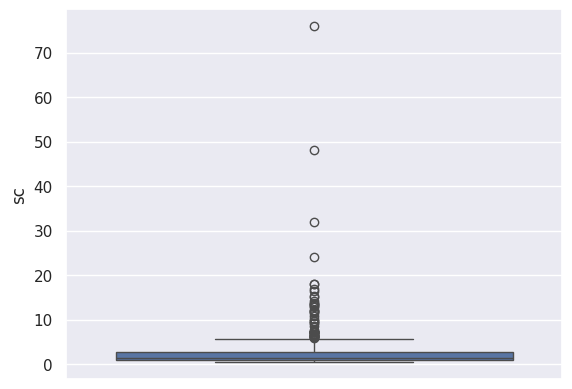

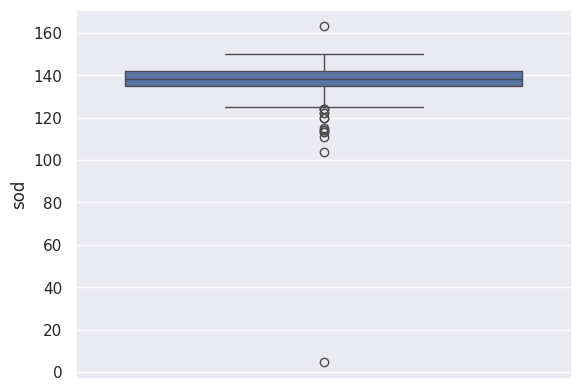

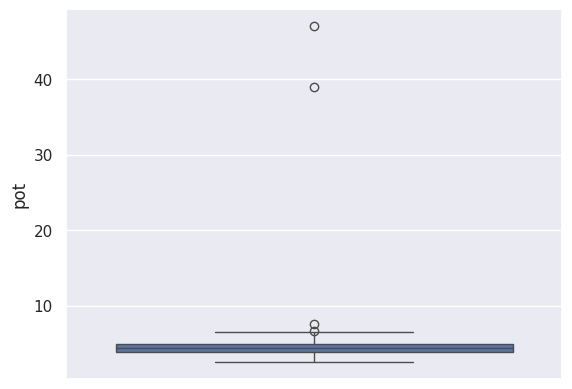

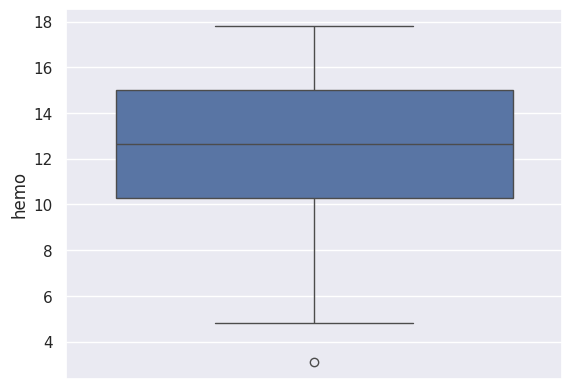

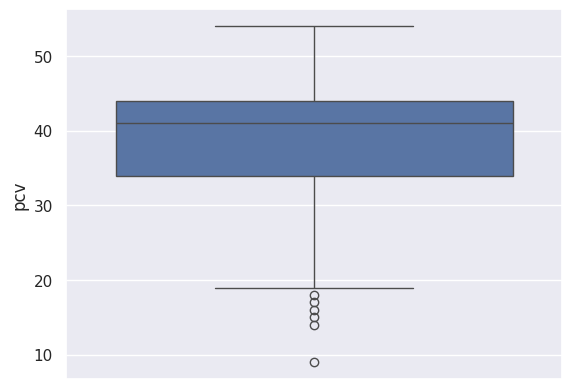

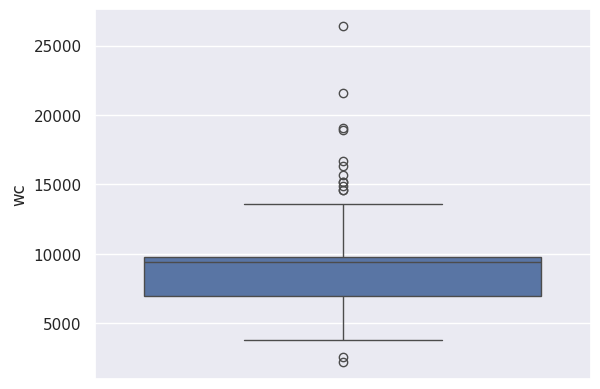

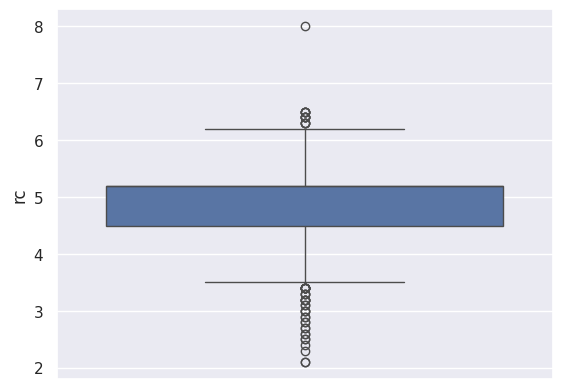

In [245]:
# checking outliers

for cols in data.columns:
  if cols in data_imp2:
    sns.boxplot(y=cols, data=data)
    plt.show()

In [246]:
# concat the data_imp1 & data_imp2

data_table = pd.concat([data_imp1,data_imp2], axis =1)
data_table.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6


In [247]:
data_table.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')

In [248]:
# split the data into independent and dependent variables
x = data_table.drop('classification', axis=1)
y = data_table['classification']

In [249]:
x.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc'],
      dtype='object')

In [250]:
y

,classification
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


In [251]:
y.value_counts()

,count
classification,
ckd,250
notckd,150


In [252]:
y = np.where(y=='ckd', 1,0)
pd.DataFrame(y).value_counts()

,count
0,
1,250
0,150


In [253]:
x["dm"]=x["dm"].map({" yes":"yes","no":"No","yes":"yes"})

In [254]:
cat_cols=[]
non_cat_cols=[]
num_cols =[]
continues_cols=[]

for cols in x.columns:
  if x[cols].dtype == 'O':
    if x[cols].nunique() < 3:
      cat_cols.append(cols)
    else:
      non_cat_cols.append(cols)

  elif x[cols].dtype != 'O':
    if x[cols].nunique() < 100:
      num_cols.append(cols)
    else:
      continues_cols.append(cols)



In [255]:
cat_cols

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [256]:
for i in cat_cols:
    print(x[i].value_counts())
    print()

rbc
normal      353
abnormal     47
Name: count, dtype: int64

pc
normal      324
abnormal     76
Name: count, dtype: int64

pcc
notpresent    358
present        42
Name: count, dtype: int64

ba
notpresent    378
present        22
Name: count, dtype: int64

htn
no     253
yes    147
Name: count, dtype: int64

dm
No     263
yes    137
Name: count, dtype: int64

cad
no     366
yes     34
Name: count, dtype: int64

appet
good    318
poor     82
Name: count, dtype: int64

pe
no     324
yes     76
Name: count, dtype: int64

ane
no     340
yes     60
Name: count, dtype: int64



In [257]:
data_dummies = pd.get_dummies(x[cat_cols],drop_first=True)
data_dummies

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,True,True,False,False,True,True,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False
2,True,True,False,False,False,True,False,True,False,True
3,True,False,True,False,True,False,False,True,True,True
4,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
395,True,True,False,False,False,False,False,False,False,False
396,True,True,False,False,False,False,False,False,False,False
397,True,True,False,False,False,False,False,False,False,False
398,True,True,False,False,False,False,False,False,False,False


In [258]:
data_dummies = data_dummies.applymap(lambda x: 1 if x else 0)
data_dummies

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,1,1,0,0,1,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1
3,1,0,1,0,1,0,0,1,1,1
4,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0
396,1,1,0,0,0,0,0,0,0,0
397,1,1,0,0,0,0,0,0,0,0
398,1,1,0,0,0,0,0,0,0,0


In [259]:
# for i in data_dummies.columns:
#     data_dummies[i] = data_dummies[i].map({True: 1, False: 0})

In [260]:
df1 = pd.concat([x.drop(columns = cat_cols), data_dummies],axis=1)

In [261]:
df1

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2,1,1,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2,1,1,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,1,1,0,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,1,1,0,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,1,1,0,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,1,1,0,0,0,0,0,0,0,0


In [262]:
df1.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,12.54250,39.260000,8775.500000,4.868750,0.882500,0.810000,0.105000,0.055000,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000
std,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,2.71649,8.191162,2597.309144,0.871606,0.322418,0.392792,0.306937,0.228266,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.10000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.87500,34.000000,6975.000000,4.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.65000,41.000000,9450.000000,5.200000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,14.62500,44.000000,9800.000000,5.200000,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.80000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [263]:
pd.DataFrame(y).value_counts(normalize=True)

,proportion
0,
1,0.625
0,0.375


In [264]:
x_train, x_test, y_train, y_test = train_test_split(df1, y, test_size=0.2, random_state=42, stratify=y)

In [265]:
pd.DataFrame(y_train).value_counts()

,count
0,
1,200
0,120


In [266]:
pd.DataFrame(y_test).value_counts()

,count
0,
1,50
0,30


Building Machine Learning Traditional Algorithm

      Method Used  Accuracy
0  LogitRegession    0.8375
1           Dtree    0.9750
2         RForest    1.0000
3             XGB    0.9875
4             KNN    0.7000
5             SVM    0.7125
6             NBT    0.9750
7          Voting    0.9875
Axes(0.125,0.11;0.775x0.77)


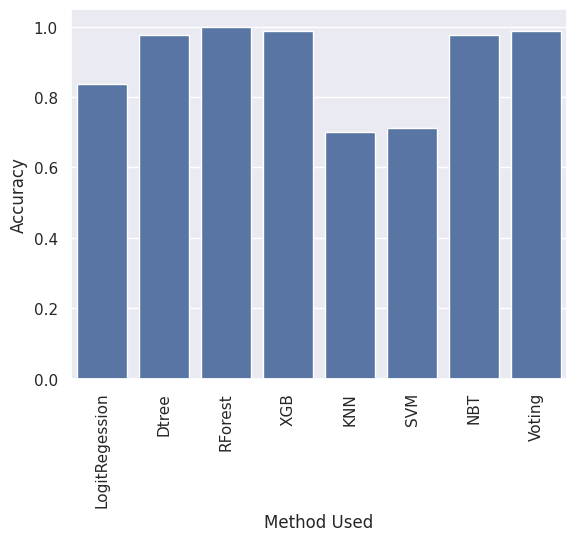

In [267]:
list_met = []
list_accuracy = []

#LogisticRegression
logit = LogisticRegression()
logit = logit.fit(x_train,y_train)
y_pred_lr = logit.predict(x_test)
accuracy_lr = accuracy_score(y_test,y_pred_lr)


# DecisionTree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest
rforest = RandomForestClassifier()
rforest = rforest.fit(x_train, y_train)
y_pred_rf = rforest.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgboost = XGBClassifier()
xgboost = xgboost.fit(x_train, y_train)
y_pred_xg = xgboost.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

# KNN
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# KNN
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# SVM
svm = SVC()
svm = svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Naive Based Theorem
nbt = GaussianNB()
nbt = nbt.fit(x_train, y_train)
y_pred_nbt = nbt.predict(x_test)
accuracy_nbt = accuracy_score(y_test, y_pred_nbt)

# Voting Classifier - combining all the above model together by using voting classifier approach
model_evc = VotingClassifier(estimators = [('logit',logit), ('dtree',dtree), ('rforest',rforest),('xgboost',xgboost),
                                           ('knn',knn),('svm',svm),('nbt',nbt)])
model_evc = model_evc.fit(x_train, y_train)
pred_evc = model_evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ['LogitRegession','Dtree','RForest','XGB','KNN','SVM','NBT','Voting']
list2 = [accuracy_lr,accuracy_dt,accuracy_rf,accuracy_xg,accuracy_knn,accuracy_svm,accuracy_nbt,accuracy_evc]
list3 = [logit,dtree,rforest,xgboost,knn,svm,nbt,model_evc]

df_accuracy = pd.DataFrame({"Method Used":list1, "Accuracy":list2})

print(df_accuracy)

chart = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)


In [268]:
# Check underfitting and overfitting problem (high bias or high variance problem)- Bias-Variance Trade off

model_evc.fit(x_train, y_train)
y_train_pred = model_evc.predict(x_train)
y_test_pred = model_evc.predict(x_test)
print("Training Score",round(accuracy_score(y_train, y_train_pred),2))
print("Testing Score",accuracy_score(y_test, y_test_pred))

Training Score 1.0
Testing Score 0.9875


In [269]:
# Cross Validation
cvs = cross_val_score(model_evc,x_train,y_train,cv=10)
print('Training Mean', round(cvs.mean(),2))

Training Mean 0.98


In [270]:
# score at each fold
cvs

array([1.     , 0.9375 , 1.     , 0.96875, 1.     , 1.     , 0.96875,
       1.     , 1.     , 0.96875])

# Classificatiion and Confusion Matrix Report

Classification Report
:               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



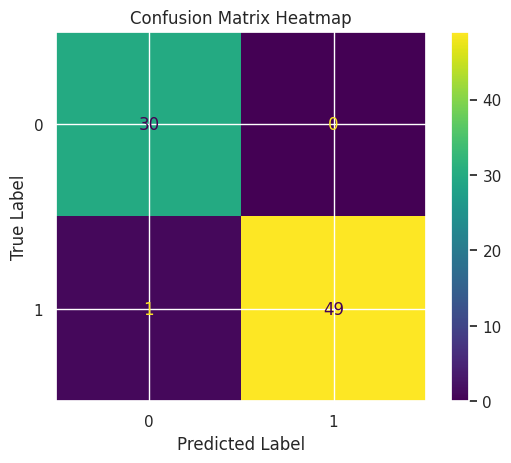

In [275]:
cm = ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,display_labels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
print('Classification Report\n:', classification_report(y_test,y_test_pred))

In [272]:
  # print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

